In [12]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [13]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [14]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
#include_top = false is basically saying that first layer and last layer is sset by user according to problem and classes they have 

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [15]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [16]:
# useful for getting number of output classes
folders = glob('../input/cotton-disease-dataset/Cotton Disease/train/*')

In [17]:
folders

['../input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant',
 '../input/cotton-disease-dataset/Cotton Disease/train/fresh cotton leaf',
 '../input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant',
 '../input/cotton-disease-dataset/Cotton Disease/train/diseased cotton leaf']

In [18]:
len(folders)

4

# Adding the last layer to model

In [19]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [21]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [22]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Data Augmentation Apply for setting image 

In [23]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# We can't scale down to test set iamge

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [25]:
test_set = test_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


# fit the model

In [26]:

# Run the cell. It will take some time to execute
runnning = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 54s 878ms/step - loss: 0.7270 - accuracy: 0.7345 - val_loss: 0.2501 - val_accuracy: 0.9151
Epoch 2/20
61/61 [==============================] - 36s 590ms/step - loss: 0.2296 - accuracy: 0.9175 - val_loss: 0.2900 - val_accuracy: 0.8962
Epoch 3/20
61/61 [==============================] - 35s 582ms/step - loss: 0.2219 - accuracy: 0.9190 - val_loss: 0.3772 - val_accuracy: 0.8491
Epoch 4/20
61/61 [==============================] - 35s 581ms/step - loss: 0.1750 - accuracy: 0.9364 - val_loss: 0.1767 - val_accuracy: 0.9340
Epoch 5/20
61/61 [==============================] - 35s 576ms/step - loss: 0.1097 - accuracy: 0.9651 - val_loss: 0.1325 - val_accuracy: 0.9623
Epoch 6/20
61/61 [==============================] - 35s 566ms/step - loss: 0.1099 - accuracy: 0.9616 - val_loss: 0.1739 - val_accuracy: 0.9434
Epoch 7/20
61/61 [==============================] - 35s 576ms/step - loss: 0.1009 - accuracy: 0.9677 - val_loss: 0.1557 - val_accuracy: 0.9528

# Visualization of loss and accuracy

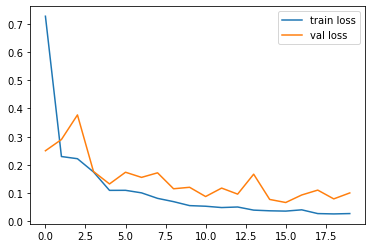

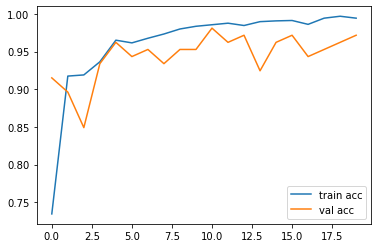

<Figure size 432x288 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(runnning.history['loss'], label='train loss')
plt.plot(runnning.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(runnning.history['accuracy'], label='train acc')
plt.plot(runnning.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [55]:

from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')


In [56]:
y_pred = model.predict(test_set)

In [57]:
y_pred

array([[3.01328346e-05, 9.99376357e-01, 1.96432593e-05, 5.73846686e-04],
       [1.96060195e-04, 3.64309043e-01, 7.86845293e-03, 6.27626359e-01],
       [2.45746705e-05, 9.99627233e-01, 1.79384188e-05, 3.30202864e-04],
       [4.19340940e-05, 9.15064156e-01, 8.83732901e-06, 8.48851576e-02],
       [5.73364552e-04, 9.11328534e-05, 9.95730937e-01, 3.60452756e-03],
       [1.53246583e-06, 9.99945998e-01, 4.42819510e-05, 8.19140678e-06],
       [1.28561687e-02, 4.98396978e-02, 4.39017406e-03, 9.32913899e-01],
       [1.52905646e-03, 8.39901157e-04, 9.95161235e-01, 2.46984512e-03],
       [2.36372042e-08, 5.75251522e-12, 1.00000000e+00, 8.31313696e-13],
       [3.96374780e-05, 9.31706652e-02, 3.11554759e-04, 9.06478167e-01],
       [4.56691778e-04, 1.86242238e-02, 1.67189017e-02, 9.64200199e-01],
       [8.98213628e-08, 9.99988437e-01, 5.51687754e-06, 5.97665758e-06],
       [1.46095135e-06, 9.99986291e-01, 7.47889771e-06, 4.80689141e-06],
       [9.99929070e-01, 6.73652394e-05, 3.33870503e

In [58]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [59]:
y_pred

array([1, 3, 1, 1, 2, 1, 3, 2, 2, 3, 3, 1, 1, 0, 3, 1, 2, 3, 2, 3, 1, 2,
       0, 1, 0, 2, 1, 3, 0, 3, 3, 1, 1, 2, 0, 1, 3, 1, 0, 0, 0, 0, 0, 1,
       1, 2, 1, 0, 2, 2, 0, 3, 2, 3, 0, 1, 3, 2, 1, 2, 1, 3, 2, 2, 3, 0,
       1, 3, 2, 2, 3, 0, 1, 1, 0, 1, 3, 3, 3, 3, 3, 2, 2, 3, 0, 1, 2, 2,
       0, 3, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 2, 3, 1])

# Test The Model using Different Images 

In [60]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [61]:
model=load_model('model_vgg16.h5')

In [62]:
img=image.load_img('../input/cotton-disease-dataset/Cotton Disease/val/diseased cotton plant/dd (107)_iaip.jpg',target_size=(224,224))

In [63]:
x=image.img_to_array(img)
x

array([[[ 58.,  52.,  38.],
        [ 60.,  54.,  40.],
        [ 69.,  63.,  49.],
        ...,
        [128., 187., 107.],
        [142., 201., 121.],
        [138., 197., 117.]],

       [[ 58.,  52.,  38.],
        [ 72.,  66.,  52.],
        [ 59.,  53.,  39.],
        ...,
        [119., 176., 107.],
        [107., 164.,  95.],
        [ 94., 151.,  82.]],

       [[ 68.,  62.,  48.],
        [ 61.,  55.,  41.],
        [ 63.,  57.,  43.],
        ...,
        [ 92., 148.,  87.],
        [ 93., 149.,  88.],
        [ 94., 150.,  89.]],

       ...,

       [[184., 167., 139.],
        [181., 164., 136.],
        [134., 117.,  89.],
        ...,
        [ 97., 164.,  87.],
        [100., 160.,  86.],
        [105., 158.,  86.]],

       [[175., 158., 130.],
        [176., 159., 131.],
        [115.,  98.,  70.],
        ...,
        [103., 163.,  93.],
        [105., 156.,  89.],
        [109., 148.,  85.]],

       [[239., 222., 194.],
        [176., 159., 131.],
        [135., 1

In [64]:
x.shape

(224, 224, 3)

In [65]:

x=x/255

In [66]:
from keras.applications.imagenet_utils import preprocess_input

In [67]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [68]:
model.predict(img_data)


array([[9.9997914e-01, 1.0237849e-11, 6.2428799e-12, 2.0843529e-05]],
      dtype=float32)

In [69]:
a=np.argmax(model.predict(img_data), axis=1)

In [70]:
a

array([0])

In [71]:
a==0

array([ True])

In [72]:
img=image.load_img('../input/cotton-disease-dataset/Cotton Disease/test/fresh cotton leaf/d (122)_iaip.jpg',target_size=(224,224))

In [73]:
x=image.img_to_array(img)
x

array([[[148., 187., 130.],
        [147., 187., 127.],
        [166., 206., 143.],
        ...,
        [ 55.,  49.,  35.],
        [ 52.,  46.,  32.],
        [ 53.,  47.,  33.]],

       [[146., 185., 128.],
        [145., 185., 125.],
        [165., 205., 142.],
        ...,
        [ 62.,  56.,  42.],
        [ 58.,  52.,  38.],
        [ 68.,  62.,  48.]],

       [[149., 188., 131.],
        [148., 188., 128.],
        [168., 208., 145.],
        ...,
        [ 67.,  61.,  47.],
        [ 63.,  57.,  43.],
        [ 61.,  55.,  41.]],

       ...,

       [[155., 183., 108.],
        [161., 189., 112.],
        [174., 203., 121.],
        ...,
        [114., 160.,  88.],
        [116., 162.,  90.],
        [122., 168.,  96.]],

       [[154., 183., 101.],
        [149., 178.,  96.],
        [161., 190., 108.],
        ...,
        [110., 155.,  90.],
        [121., 167.,  95.],
        [122., 168.,  96.]],

       [[157., 186., 104.],
        [134., 163.,  81.],
        [148., 1

In [74]:
x.shape

(224, 224, 3)

In [75]:

x=x/255

In [76]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [77]:
model.predict(img_data)


array([[9.9997056e-01, 1.0353443e-11, 8.3548611e-12, 2.9439223e-05]],
      dtype=float32)

In [78]:
a=np.argmax(model.predict(img_data), axis=1)

In [79]:
a

array([0])

In [80]:
a==0

array([ True])

In [83]:
test_image = image.load_img('../input/cotton-disease-dataset/Cotton Disease/test/fresh cotton leaf/d (122)_iaip.jpg',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [93]:
test_image.shape

(1, 224, 224, 3)

In [84]:
result

array([[9.02169120e-07, 3.81903860e-08, 9.99998927e-01, 1.04782224e-07]],
      dtype=float32)

In [90]:
result=np.argmax(model.predict(test_image), axis=1)

In [91]:
result

array([2])